## 1

In [161]:
import torch
import torch.nn as nn
import torch.nn.functional as F
%matplotlib inline

In [3]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.fc1 = nn.Linear(1000,100)
        self.fc2 = nn.Linear(100,10)
        self.relu = nn.ReLU()
    
    def forward(self, x):
        h = self.fc1(x)
        h_relu = self.relu(h)
        y_pred = self.fc2(h_relu)
        
        return y_pred

In [39]:
model = Model()
loss_fn = nn.MSELoss(reduction='sum')
optim = torch.optim.SGD(model.parameters(),lr=1e-6)

In [41]:
input = torch.randn(64, 1000)
target = torch.randn(64, 10)
for i in range(50000):
    optim.zero_grad()
    output = model(input)
    loss = loss_fn(output,target)
    loss.backward()
    optim.step()
    if i % 1000 == 0:
        print(i,loss)

0 tensor(609.2297, grad_fn=<MseLossBackward>)
1000 tensor(336.9960, grad_fn=<MseLossBackward>)
2000 tensor(195.3590, grad_fn=<MseLossBackward>)
3000 tensor(108.8353, grad_fn=<MseLossBackward>)
4000 tensor(59.0669, grad_fn=<MseLossBackward>)
5000 tensor(32.0707, grad_fn=<MseLossBackward>)
6000 tensor(17.6329, grad_fn=<MseLossBackward>)
7000 tensor(9.8478, grad_fn=<MseLossBackward>)
8000 tensor(5.5903, grad_fn=<MseLossBackward>)
9000 tensor(3.2404, grad_fn=<MseLossBackward>)
10000 tensor(1.9176, grad_fn=<MseLossBackward>)
11000 tensor(1.1568, grad_fn=<MseLossBackward>)
12000 tensor(0.7127, grad_fn=<MseLossBackward>)
13000 tensor(0.4479, grad_fn=<MseLossBackward>)
14000 tensor(0.2867, grad_fn=<MseLossBackward>)
15000 tensor(0.1868, grad_fn=<MseLossBackward>)
16000 tensor(0.1236, grad_fn=<MseLossBackward>)
17000 tensor(0.0829, grad_fn=<MseLossBackward>)
18000 tensor(0.0563, grad_fn=<MseLossBackward>)
19000 tensor(0.0386, grad_fn=<MseLossBackward>)
20000 tensor(0.0268, grad_fn=<MseLossBackw

## 2

In [43]:
print(torch.cuda.is_available())

True


In [44]:
torch.__version__

'1.2.0'

## 3

In [379]:
x = torch.linspace(0,10,200)
x = 2 * x.pow(2)
x = x.reshape(200,1)

y = torch.linspace(0,100,200)
y = y.sqrt()
y = y.reshape(200,1)

target = x + y + 0.2 * torch.rand(200,1)

In [384]:
data = torch.cat((x,y),1)

In [385]:
class Net(nn.Module):
    def __init__(self, n_input, n_output):
        super(Net, self).__init__()
        self.linear1 = nn.Linear(n_input, 20)
        self.relu = F.relu
        self.output1 = nn.Linear(20, n_output)
        
    def forward(self, x):
        x = self.linear1(x)
        x = self.relu(x)
        x = self.output1(x)
        return x

In [397]:
model = Net(2,1)
loss_fn = nn.MSELoss(reduction='sum')
optim = torch.optim.SGD(model.parameters(),lr=1e-7)

In [403]:
for i in range(5000):
    optim.zero_grad()
    output = model(data)
    loss = loss_fn(output,target)
    loss.backward()
    optim.step()
    if i % 500 == 0:
        print(i,loss)

0 tensor(1.6523, grad_fn=<MseLossBackward>)
500 tensor(1.6318, grad_fn=<MseLossBackward>)
1000 tensor(1.6120, grad_fn=<MseLossBackward>)
1500 tensor(1.5930, grad_fn=<MseLossBackward>)
2000 tensor(1.5747, grad_fn=<MseLossBackward>)
2500 tensor(1.5570, grad_fn=<MseLossBackward>)
3000 tensor(1.5399, grad_fn=<MseLossBackward>)
3500 tensor(1.5235, grad_fn=<MseLossBackward>)
4000 tensor(1.5076, grad_fn=<MseLossBackward>)
4500 tensor(1.4923, grad_fn=<MseLossBackward>)


In [408]:
x = torch.tensor([5.0,5])
z = model(x)
z

tensor([10.1631], grad_fn=<AddBackward0>)

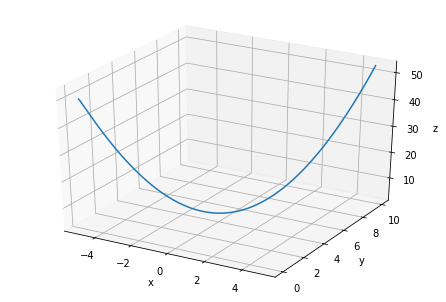

In [292]:
from matplotlib import pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
 
fig = plt.figure()
ax = Axes3D(fig)
 
X = np.linspace(-5,5,200)
Y = np.linspace(0,10,200)
# X, Y = np.meshgrid(X, Y)
# Z = output.detach().numpy().reshape(-1)
Z = 2 * np.square(X) + np.sqrt(Y)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
surf = ax.plot(X, Y, Z)

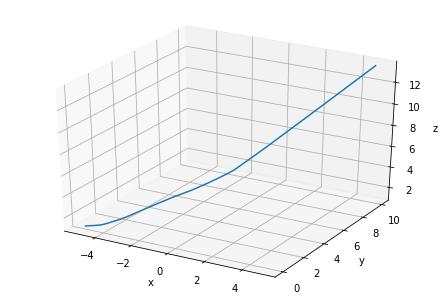

In [291]:
X = np.linspace(-5,5,200)
Y = np.linspace(0,10,200)
X = torch.tensor(X).type(torch.FloatTensor)
Y = torch.tensor(Y).type(torch.FloatTensor)
Z = model(X.reshape(200,1),Y.reshape(200,1))
Z = Z.detach().numpy().flatten()
X = np.linspace(-5,5,200)
Y = np.linspace(0,10,200)

fig = plt.figure()
ax = Axes3D(fig)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
surf = ax.plot(X, Y, Z)

## 4

In [360]:
from torch.autograd import Variable

In [361]:
n_data = torch.ones(100, 2)
data = []
label = []
for i in range(5):
    data.append(torch.normal(5 * i * n_data, 1))
    label.append(torch.zeros(100) + i)

In [362]:
x = torch.cat((data), 0).type(torch.FloatTensor)
y = torch.cat((label), ).type(torch.LongTensor)

In [363]:
x, y = Variable(x), Variable(y)

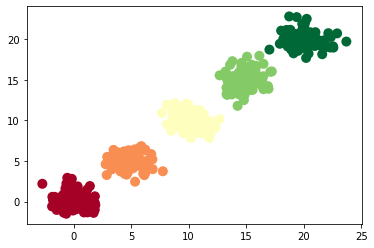

In [364]:
plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c = y.data.numpy(), s = 100, lw = 0, cmap = 'RdYlGn')
plt.show()

In [365]:
y

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [366]:
class Net(nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)
        self.prediction = torch.nn.Linear(n_hidden, n_output)
        
    def forward(self, x):
        x = F.relu(self.hidden(x))
        x = self.prediction(x)
        return x

In [367]:
net = Net(n_feature = 2, n_hidden = 10, n_output = 5)

In [368]:
optimizer = torch.optim.SGD(net.parameters(), lr = 1e-6)
loss_func = torch.nn.CrossEntropyLoss()

0 tensor(1.4237, grad_fn=<NllLossBackward>) 0.514


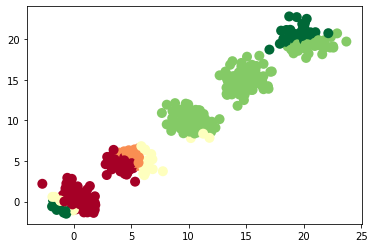

5000 tensor(0.4565, grad_fn=<NllLossBackward>) 0.79


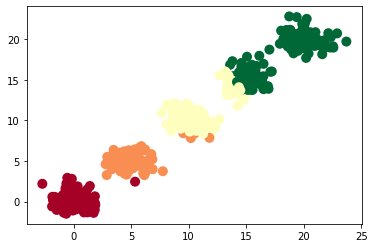

10000 tensor(0.0866, grad_fn=<NllLossBackward>) 0.992


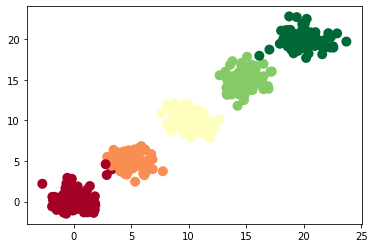

15000 tensor(0.0722, grad_fn=<NllLossBackward>) 0.978


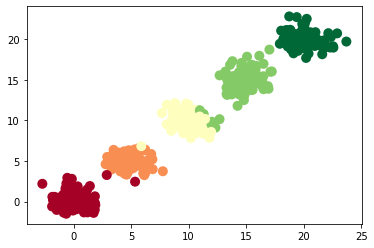

20000 tensor(0.0146, grad_fn=<NllLossBackward>) 0.996


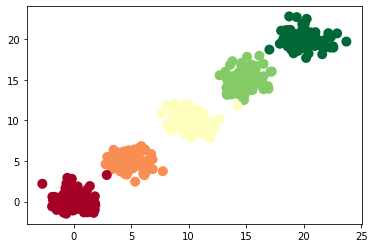

25000 tensor(0.0105, grad_fn=<NllLossBackward>) 1.0


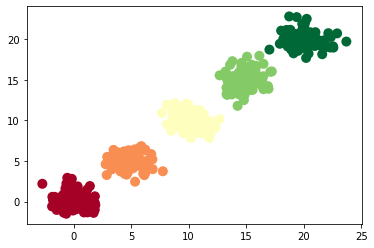

30000 tensor(0.0285, grad_fn=<NllLossBackward>) 0.984


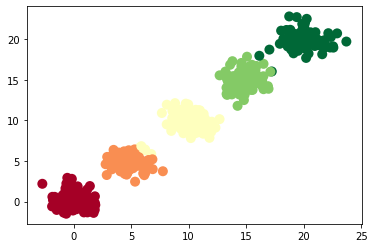

35000 tensor(0.0062, grad_fn=<NllLossBackward>) 0.994


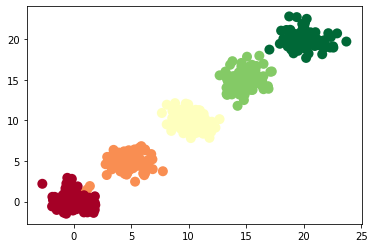

40000 tensor(0.0155, grad_fn=<NllLossBackward>) 0.988


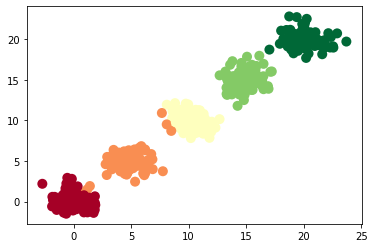

45000 tensor(0.0069, grad_fn=<NllLossBackward>) 0.996


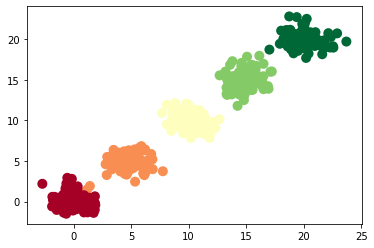

In [370]:
for i in range(50000):
    pred = net(x)
    loss = loss_func(pred, y)
    optim.zero_grad()
    loss.backward()
    optimizer.step()
    if i % 5000 == 0:
        pred_label = torch.max(pred, 1)[1]
        pred_label = pred_label.detach().numpy()
        target_label = y.numpy()
        plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c =pred_label, s = 100, lw = 0, cmap = 'RdYlGn')
        accuracy = (pred_label == target_label).sum() / target_label.size
        print(i,loss,accuracy)
        plt.show()